#  Exploratory Data Analysis

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

# Load cleaned data

In [34]:
df = pd.read_csv('../data/feat_engr_data.csv') 
print('Data size',df.shape)
df.head()

Data size (3817613, 48)


,c_year,c_mnth,c_wday,c_hour,class,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,psn_ct,avg_rsur_per_day,avg_raln_per_day,avg_psn_per_day,isev_ct,vtype_ct,traf_ct,avg_isev_per_day,avg_vtype_per_day,avg_traf_per_day
0,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,2584453,5.180113,5.924083,5.134903,2151965,3449952,1184092,4.275617,6.854513,2.352605
1,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,2584453,5.180113,5.924083,5.134903,1641640,3449952,1184092,3.261681,6.854513,2.352605
2,1999,January,Monday,20.0,0,1.0,Ran off left shoulder,Intersection with parking lot entrance,Clear and sunny,"Dry, normal",...,2584453,5.180113,0.484907,5.134903,2151965,3449952,2231,4.275617,6.854513,0.004433
3,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,2584453,1.500935,0.287296,5.134903,1641640,112276,2048382,3.261681,0.223075,4.069814
4,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,687278,1.500935,0.287296,1.365514,1641640,112276,2048382,3.261681,0.223075,4.069814


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817613 entries, 0 to 3817612
Data columns (total 48 columns):
 #   Column             Dtype  
---  ------             -----  
 0   c_year             int64  
 1   c_mnth             object 
 2   c_wday             object 
 3   c_hour             float64
 4   class              int64  
 5   c_vehs             float64
 6   c_conf             object 
 7   c_rcfg             object 
 8   c_wthr             object 
 9   c_rsur             object 
 10  c_raln             object 
 11  c_traf             object 
 12  v_id               float64
 13  v_type             object 
 14  v_year             float64
 15  p_id               float64
 16  p_sex              object 
 17  p_age              float64
 18  p_psn              object 
 19  p_isev             object 
 20  p_safe             object 
 21  p_user             object 
 22  c_case             int64  
 23  wday_ct            int64  
 24  mnth_ct            int64  
 25  year_ct           

# Class distribution

In [4]:
label_pct = df['class'].value_counts(normalize = True)*100
label_ct =  df['class'].value_counts()
pd.DataFrame({'labels': label_pct.index, 'count': label_ct.values, 'percentage': label_pct.values})

,labels,count,percentage
0,0,3756304,98.394049
1,1,61309,1.605951


# Descriptive statistics

In [5]:
df.drop('class', axis =1).describe()

,c_year,c_hour,c_vehs,v_id,v_year,p_id,p_age,c_case,wday_ct,mnth_ct,...,psn_ct,avg_rsur_per_day,avg_raln_per_day,avg_psn_per_day,isev_ct,vtype_ct,traf_ct,avg_isev_per_day,avg_vtype_per_day,avg_traf_per_day
count,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,...,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06
mean,2.007373e+03,1.371886e+01,2.099251e+00,1.548594e+00,1.999937e+03,1.512814e+00,3.664816e+01,1.275838e+06,5.506330e+05,3.212393e+05,...,1.894898e+06,3.575406e+00,4.385734e+00,3.469931e+00,1.919134e+06,3.124013e+06,1.525973e+06,3.519232e+00,5.728807e+00,2.798398e+00
std,5.455213e+00,5.106257e+00,1.102796e+00,8.167865e-01,7.572315e+00,1.230836e+00,1.868770e+01,7.419594e+05,5.485928e+04,3.014784e+04,...,1.010024e+06,1.835018e+00,2.090246e+00,1.884509e+00,2.936949e+05,9.984882e+05,6.209267e+05,6.408663e-01,1.921342e+00,1.175872e+00
min,1.999000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.901000e+03,1.000000e+00,1.000000e+00,1.524000e+03,4.683690e+05,2.605760e+05,...,2.240000e+02,2.782659e-04,2.574651e-02,3.443733e-04,2.400800e+04,6.430000e+02,2.310000e+02,3.690943e-02,9.885358e-04,3.551349e-04
25%,2.003000e+03,1.000000e+01,2.000000e+00,1.000000e+00,1.995000e+03,1.000000e+00,2.200000e+01,6.370150e+05,5.033110e+05,3.109770e+05,...,6.872780e+05,1.424173e+00,4.583940e+00,1.292639e+00,1.641640e+06,3.449952e+06,1.184092e+06,3.087612e+00,5.303889e+00,2.077945e+00
50%,2.007000e+03,1.400000e+01,2.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,3.500000e+01,1.272317e+06,5.316860e+05,3.342180e+05,...,2.584453e+06,4.575349e+00,5.291193e+00,4.535417e+00,2.151965e+06,3.449952e+06,2.048382e+06,3.505014e+00,6.122223e+00,3.149143e+00
75%,2.012000e+03,1.700000e+01,2.000000e+00,2.000000e+00,2.005000e+03,2.000000e+00,5.000000e+01,1.914410e+06,5.698380e+05,3.416400e+05,...,2.584453e+06,4.915189e+00,5.621110e+00,4.872291e+00,2.151965e+06,3.449952e+06,2.048382e+06,4.047436e+00,6.503956e+00,3.852616e+00
max,2.017000e+03,2.300000e+01,7.700000e+01,7.700000e+01,2.018000e+03,9.300000e+01,9.900000e+01,2.570235e+06,6.504570e+05,3.562190e+05,...,2.584453e+06,5.566568e+00,6.366040e+00,5.517985e+00,2.151965e+06,3.449952e+06,2.048382e+06,4.594593e+00,7.365885e+00,4.373436e+00


# Correlation matrix

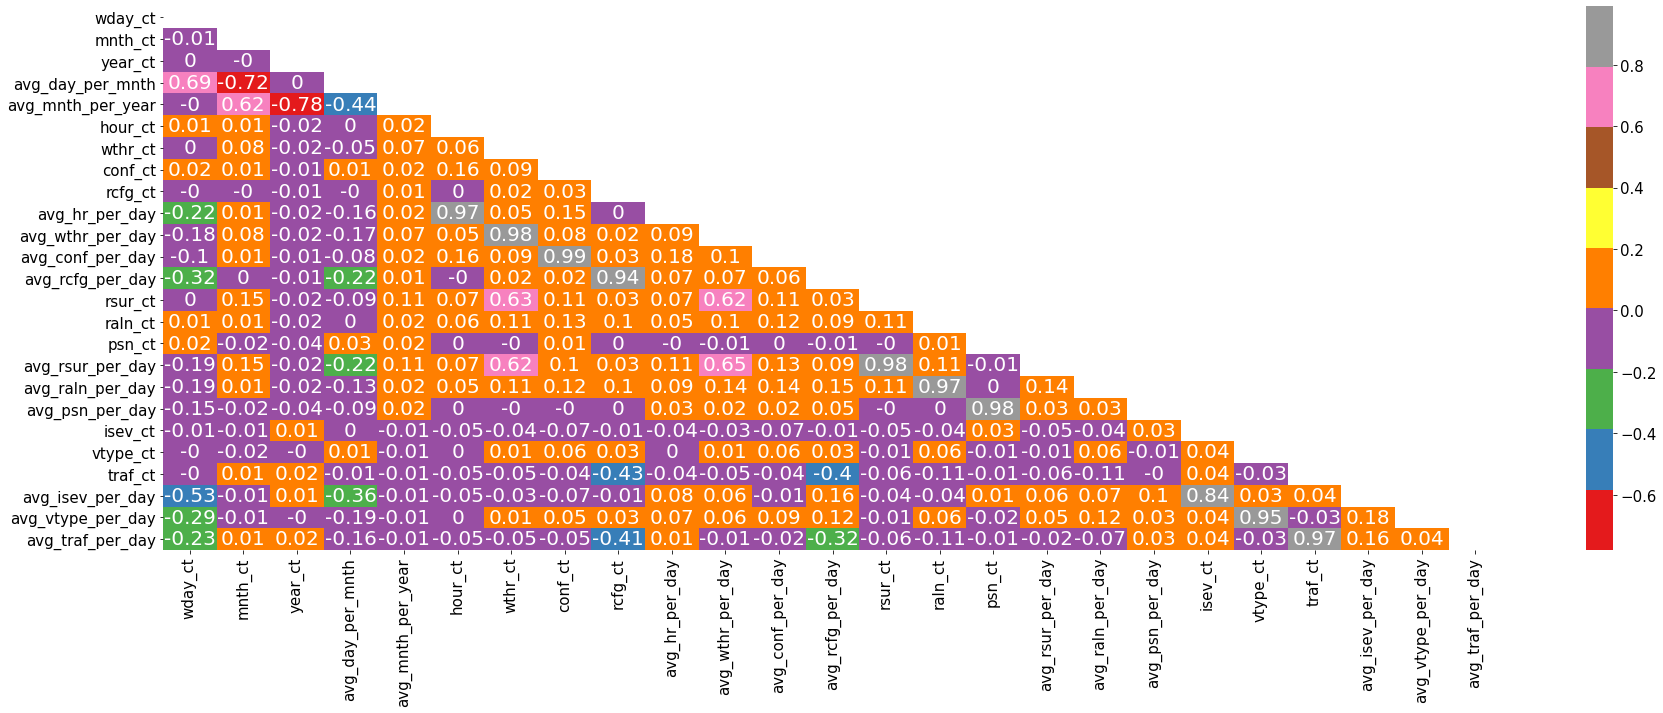

In [6]:
fig, ax = plt.subplots(figsize=(30,10))

# Correlation matrix
cols =['wday_ct', 'mnth_ct', 'year_ct', 'avg_day_per_mnth',
       'avg_mnth_per_year', 'hour_ct', 'wthr_ct', 'conf_ct', 'rcfg_ct',
       'avg_hr_per_day', 'avg_wthr_per_day', 'avg_conf_per_day',
       'avg_rcfg_per_day', 'rsur_ct', 'raln_ct', 'psn_ct', 'avg_rsur_per_day',
       'avg_raln_per_day', 'avg_psn_per_day', 'isev_ct', 'vtype_ct', 'traf_ct',
       'avg_isev_per_day', 'avg_vtype_per_day', 'avg_traf_per_day'
       ]
corr_matrix = df[cols].corr()

# Plot
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(corr_matrix, 2), annot=True, annot_kws={"size": 20},mask = mask, 
            cmap = plt.get_cmap("Set1"),ax = ax)
plt.show()

# Histogram

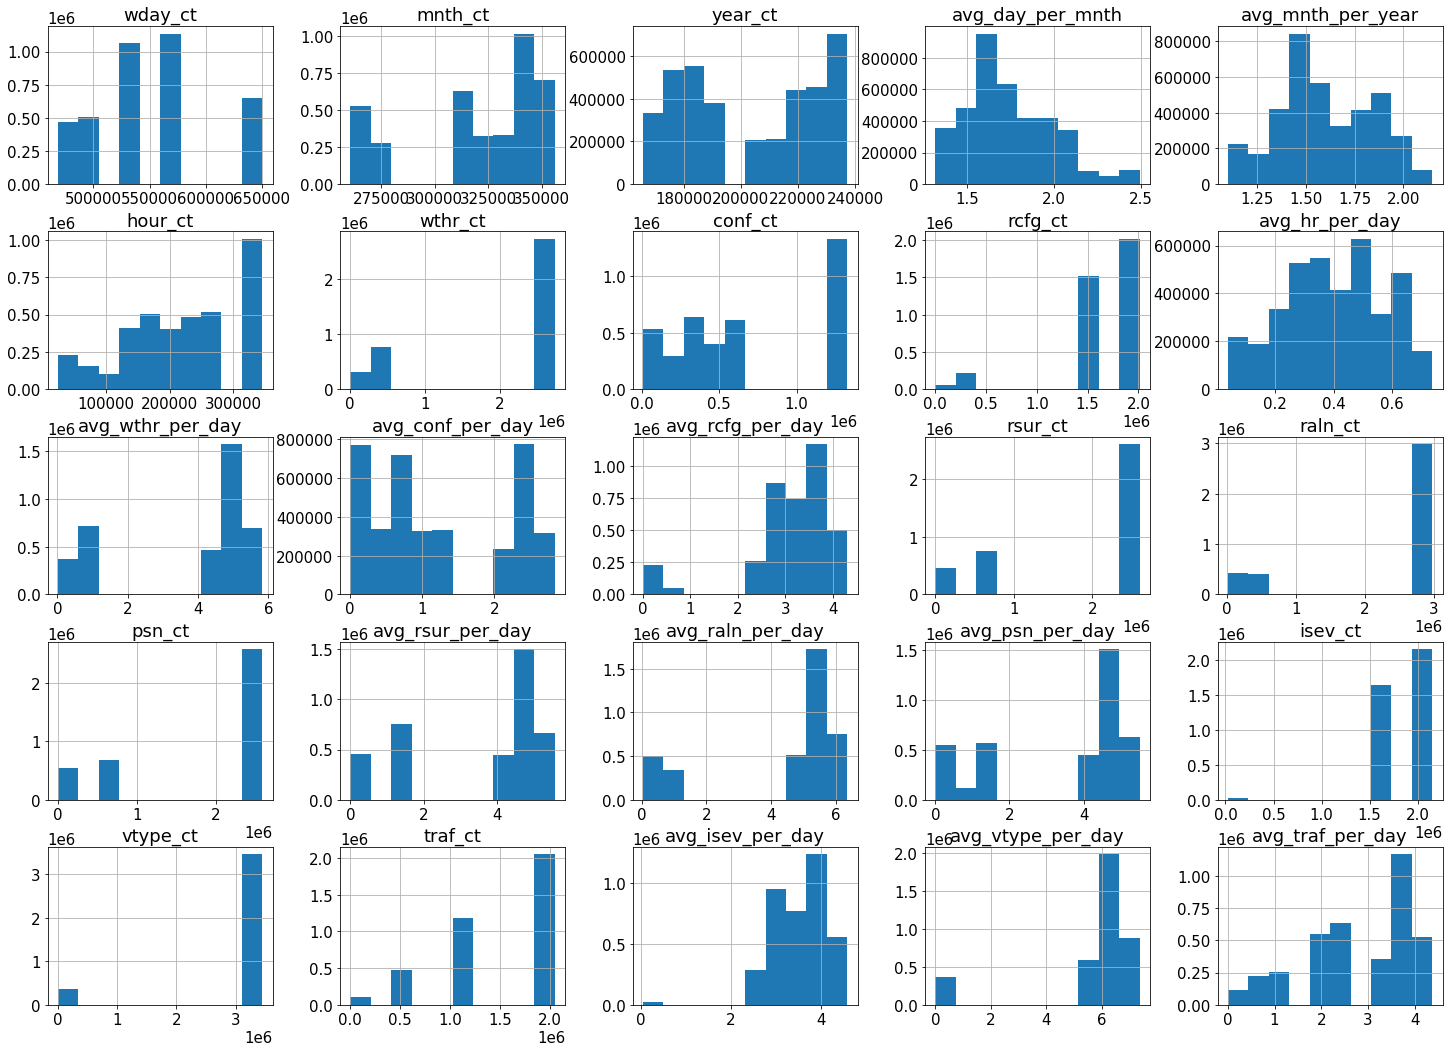

In [7]:
df[cols].hist(figsize = (25,18))
plt.show()

# Fatality rate by collision hour

In [8]:
pivot_tab_hr1 = df.pivot_table('hour_ct', index = 'c_hour', columns = 'p_isev', aggfunc = 'count', margins = True, margins_name = 'Total')
pivot_tab_hr1['Fatality'] = pivot_tab_hr1['Fatality']/pivot_tab_hr1['Total']
pivot_tab_hr1['Injury'] = pivot_tab_hr1['Injury']/pivot_tab_hr1['Total']
pivot_tab_hr1['No Injury'] = pivot_tab_hr1['No Injury']/pivot_tab_hr1['Total']

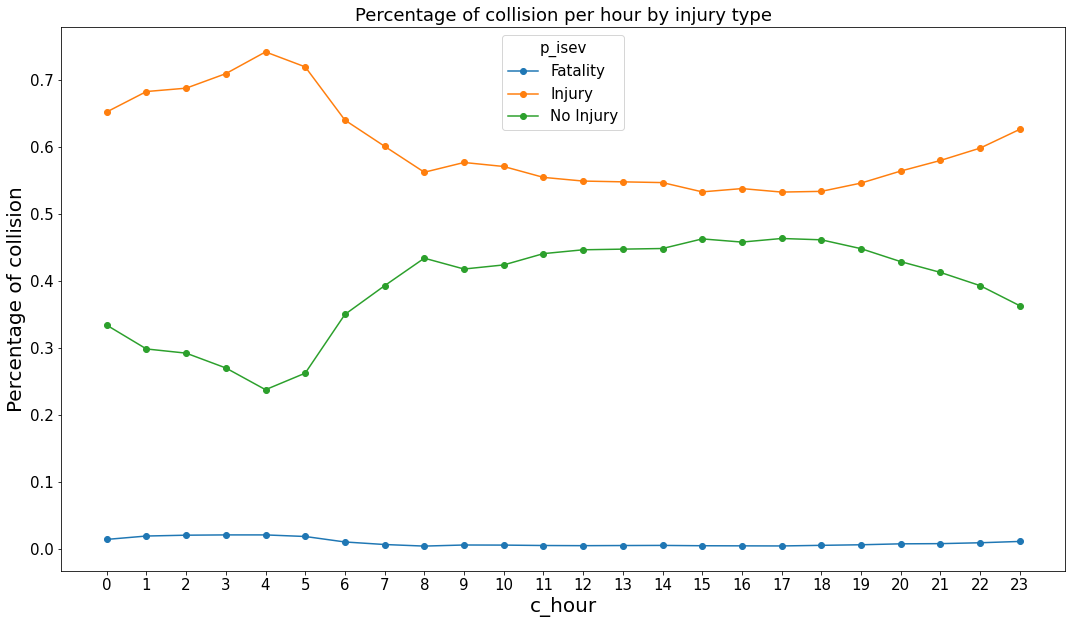

<Figure size 432x288 with 0 Axes>

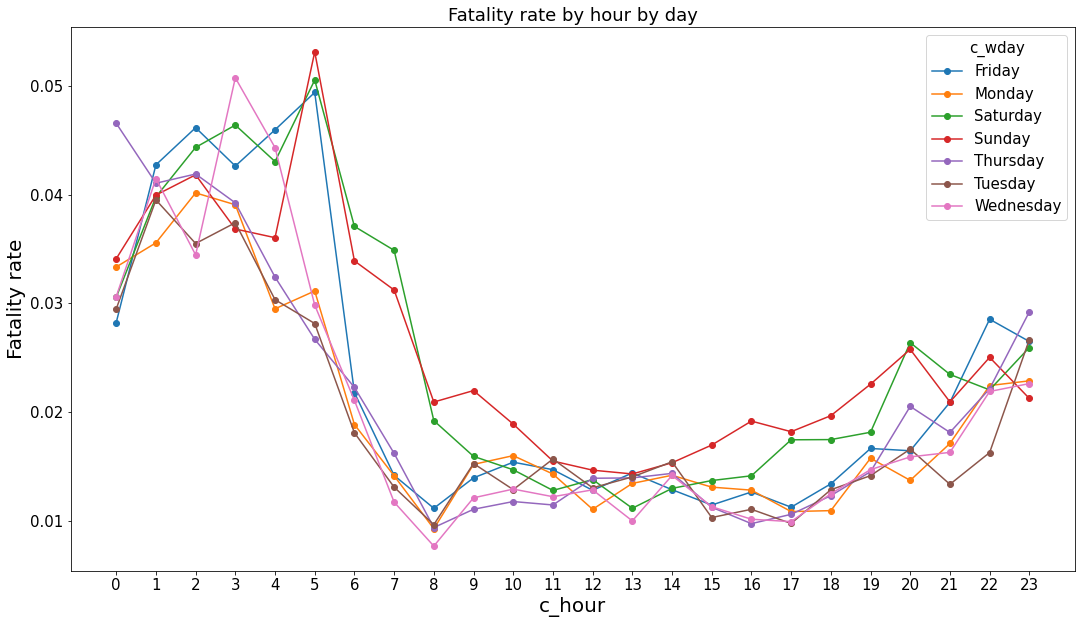

In [9]:

# pivot tables
pivot_tab_hr1 = df.pivot_table('hour_ct', index = 'c_hour', columns = 'p_isev', aggfunc = 'count', margins = True, margins_name = 'Total')
pivot_tab_hr1['Fatality'] = pivot_tab_hr1['Fatality']/pivot_tab_hr1['Total']
pivot_tab_hr1['Injury'] = pivot_tab_hr1['Injury']/pivot_tab_hr1['Total']
pivot_tab_hr1['No Injury'] = pivot_tab_hr1['No Injury']/pivot_tab_hr1['Total']
pivot_tab_hr1.drop('Total', axis =1, inplace=True)

pivot_tab_hr2 = df.pivot_table('class', index = 'c_hour', columns = 'c_wday', aggfunc = 'mean')

# plots
pivot_tab_hr1.drop('Total').plot(marker = 'o', figsize = (18,10))
plt.xlabel('c_hour', fontsize = 20)
plt.ylabel('Percentage of collision', fontsize = 20)
plt.title('Percentage of collision per hour by injury type')
plt.xticks(np.arange(24))
plt.savefig('../image/fig_h1.png')
plt.show()

plt.figure()
pivot_tab_hr2.plot(marker = 'o', figsize = (18,10))
plt.xlabel('c_hour', fontsize = 20)
plt.ylabel('Fatality rate', fontsize = 20)
plt.title('Fatality rate by hour by day')
plt.xticks(np.arange(24))
plt.savefig('../image/fig_h2.png')
plt.show()

#   Fatality rate by gender
- Almost 1 in 100 females are involved in fatal accidents, whereas 2 in 100 males are involved in fatal accidents. Therefore, the fatality rate is high for males than females.

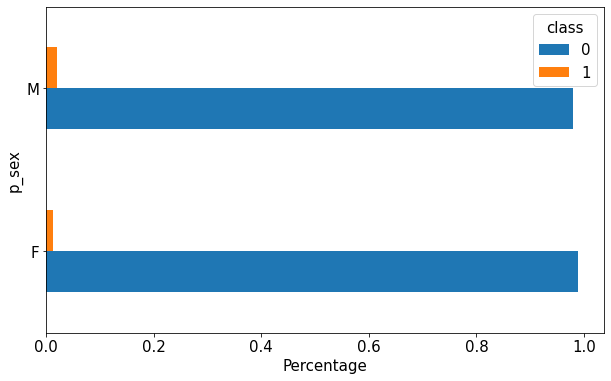

In [16]:
pvt = pd.crosstab(index = df['p_sex'], columns = df['class'], normalize = 'index')
pvt.plot(kind = 'barh', stacked = False, figsize = (10,6))
plt.xlabel('Percentage')
plt.show()

#  Age group are involved in fatal collision

- Young people in their 20s (mostly males) are involved in most fatal collisions
-  Fatality rate is increases in older people

In [17]:
df.pivot_table('p_age', index = 'p_sex', columns = 'class', aggfunc = 'mean')

class,0,1
p_sex,,
F,36.490061,39.067853
M,36.727187,38.287308


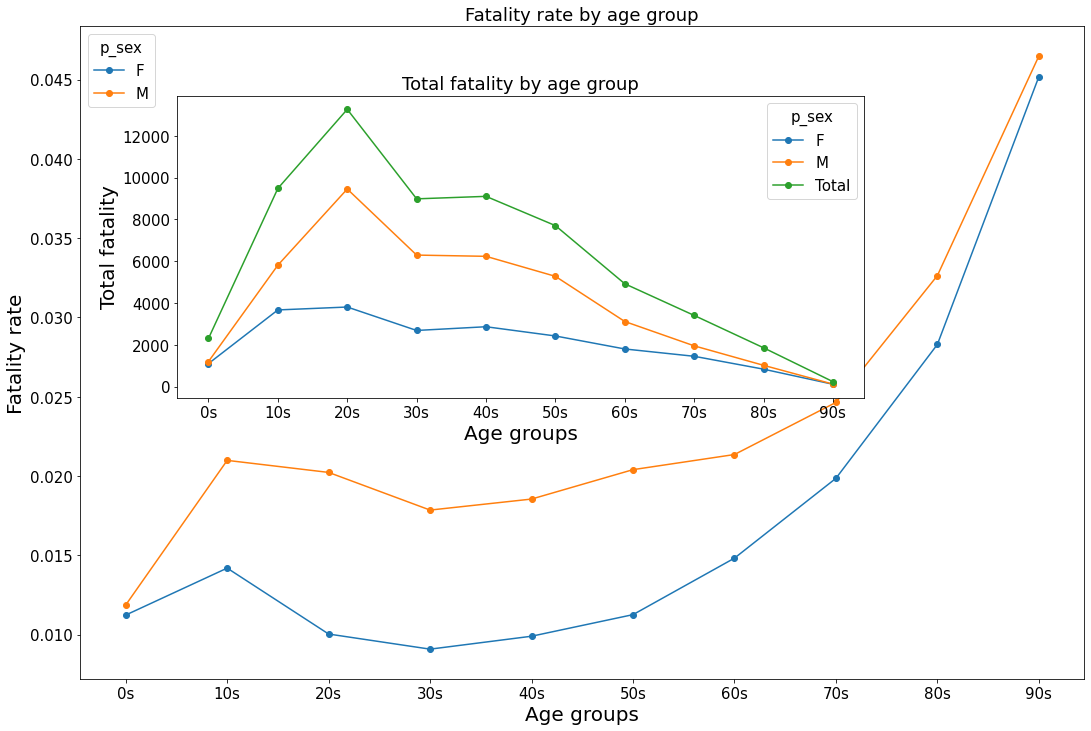

In [37]:
# Creare dataframe
df_p_age = df.copy()
df_p_age['p_age_decade'] = (df_p_age['p_age']//10)*10 # Add age group

# pivot table
pivot_tab_age1 = df_p_age.pivot_table('class', index = 'p_age_decade', columns = 'p_sex', aggfunc = 'sum', margins = True, margins_name = 'Total')
pivot_tab_age2 = df_p_age.pivot_table('class', index = 'p_age_decade', columns = 'p_sex', aggfunc = 'mean')

labels = ['0s', '10s', '20s', '30s', '40s', '50s','60s', '70s', '80s', '90s']

tick1 = list(pivot_tab_age1.index)
tick2 = list(pivot_tab_age2.index)
tick1.remove('Total')

# plots
fig, ax1 = plt.subplots(figsize=(18, 12))
left, bottom, width, height = [0.2,0.45,0.53,0.35]
ax2 = fig.add_axes([left, bottom, width, height])

pivot_tab_age2.plot(marker = 'o', ax = ax1)
pivot_tab_age1.drop(['Total']).plot(marker = 'o', ax = ax2)
ax1.set_xlabel('Age groups', fontsize = 20)
ax1.set_ylabel('Fatality rate', fontsize = 20)
ax1.set_title('Fatality rate by age group')
ax1.set_xticks(tick1)
ax1.set_xticklabels(labels)
ax2.set_xlabel('Age groups', fontsize = 20)
ax2.set_ylabel('Total fatality', fontsize = 20)
ax2.set_title('Total fatality by age group')
ax2.set_xticks(tick2)
ax2.set_xticklabels(labels)
plt.savefig('../image/fig3a.png')

# Age distribution among fatal collision

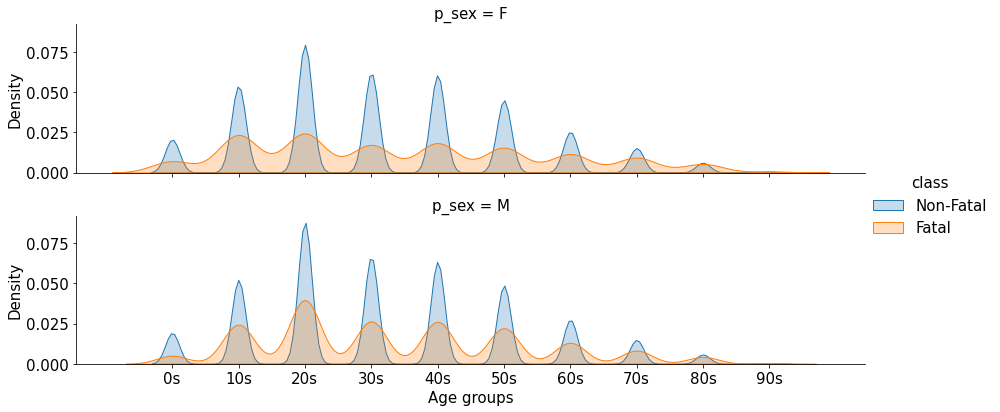

In [19]:
# Map class label
df_p_age['class'] =  df_p_age['class'].map({1:'Fatal', 0:'Non-Fatal'})

# Plot
g = sns.FacetGrid(data = df_p_age.dropna(), hue = 'class',row= 'p_sex',aspect=4)
(g.map(sns.kdeplot, 'p_age_decade', fill = True)\
    .set_axis_labels("Age groups","Density")\
        .add_legend()
        )

labels = ['0s', '10s', '20s', '30s', '40s', '50s','60s', '70s', '80s', '90s']
plt.xticks(np.arange(0,100,10),labels)
plt.savefig('../image/fig3b.png')
plt.show()

#  Vehicle model year involved in  fatal collisions
-  The light duty 2000s (i.e. 2000-2009) model vehicles are involved in the most fatal collisions.

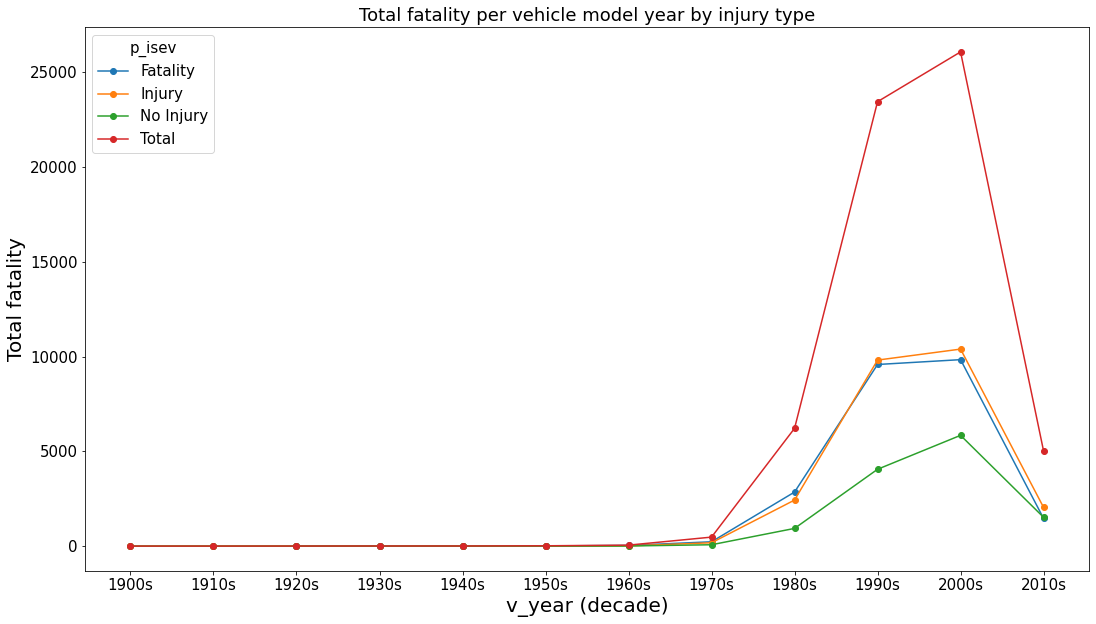

<Figure size 432x288 with 0 Axes>

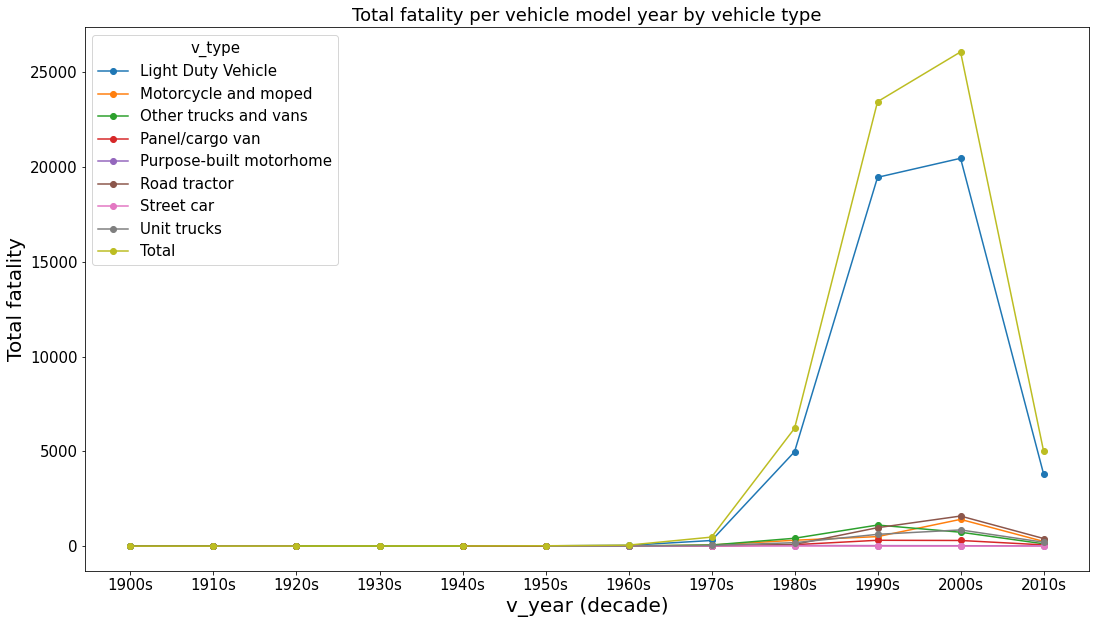

In [20]:
# Create dataframe
df_v_year =df.copy()
df_v_year['v_year_decade'] = (df_v_year['v_year']//10)*10

# pivot table
pivot_tab_vyr1 = df_v_year.pivot_table('class', index = 'v_year_decade', columns = 'p_isev', aggfunc = 'sum', margins = True, margins_name = 'Total')
pivot_tab_vyr2 = df_v_year.pivot_table('class', index = 'v_year_decade', columns = 'v_type', aggfunc = 'sum', margins = True, margins_name = 'Total')

labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s',
        '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
drop_cols = ['Fire engine', 'Smaller school bus', 'School bus', 'Urban and Intercity Bus', 'Bicycle']

# plots
pivot_tab_vyr1.drop(['Total']).plot(marker = 'o', figsize=(18, 10))
plt.xlabel('v_year (decade)', fontsize = 20)
plt.ylabel('Total fatality', fontsize = 20)
plt.xticks(np.arange(1900,2020,10), labels)
plt.title('Total fatality per vehicle model year by injury type')
plt.savefig('../image/fig5a.png')
plt.show()

plt.figure()
pivot_tab_vyr2.drop(['Total']).drop(drop_cols, axis = 1).plot(marker = 'o', figsize=(18, 10))
plt.xlabel('v_year (decade)', fontsize = 20)
plt.ylabel('Total fatality', fontsize = 20)
plt.xticks(np.arange(1900,2020,10), labels)
plt.title('Total fatality per vehicle model year by vehicle type')
plt.savefig('../image/fig5b.png')
plt.show()

# Distribution of vehicle model year by gender
- The vehicle models in 2000s are involved in most fatal collisions.

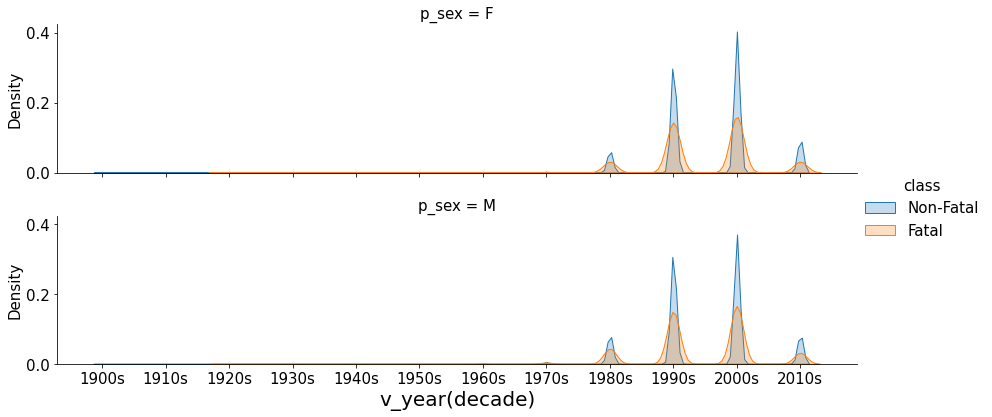

In [36]:
# Create dataframe
df_v_year = df.copy()
df_v_year['v_year_decade'] = (df_v_year['v_year']//10)*10
df_v_year['class'] =  df_v_year['class'].map({1:'Fatal', 0:'Non-Fatal'})

# plot
g = sns.FacetGrid(data = df_v_year.dropna(), hue = 'class',row = 'p_sex', aspect =4)  
(g.map(sns.kdeplot, 'v_year_decade', fill = True)\
    .set_axis_labels("Vehicle model year","Density")\
        .add_legend())

labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s',
        '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'
        ]

plt.xlabel("v_year(decade)", fontsize = 20)
plt.xticks(np.arange(1900,2020,10), labels)
plt.savefig('../image/fig7.png')

# Fatality rate by year
- Fatal collisions were mostly in the years 1999 & 2006 and the weather condition was visibility limited.

- Fatality rate peaked in July 2003

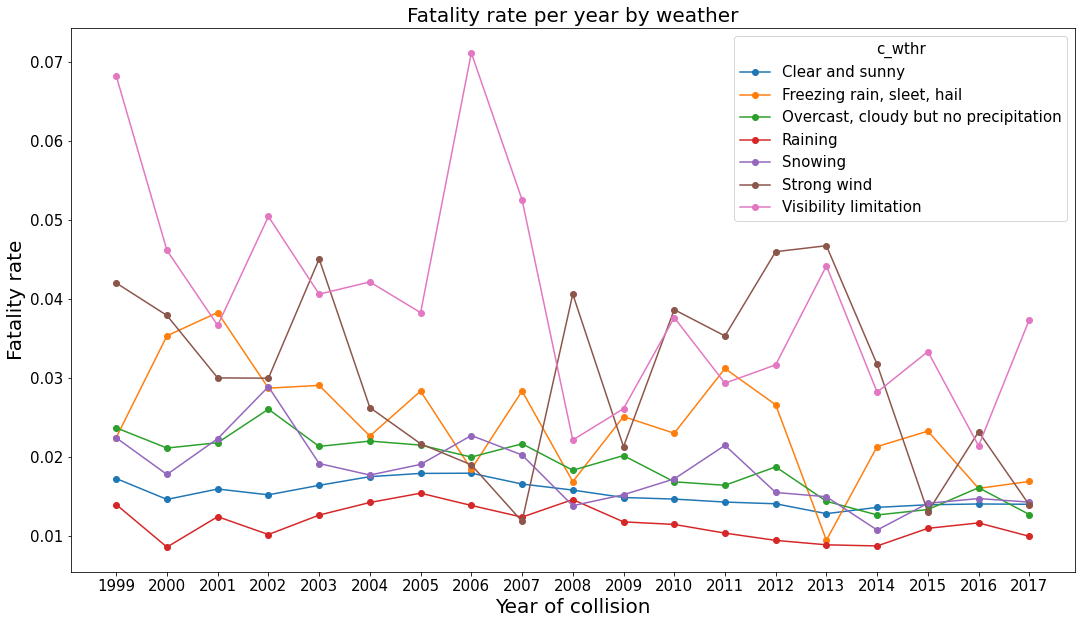

<Figure size 432x288 with 0 Axes>

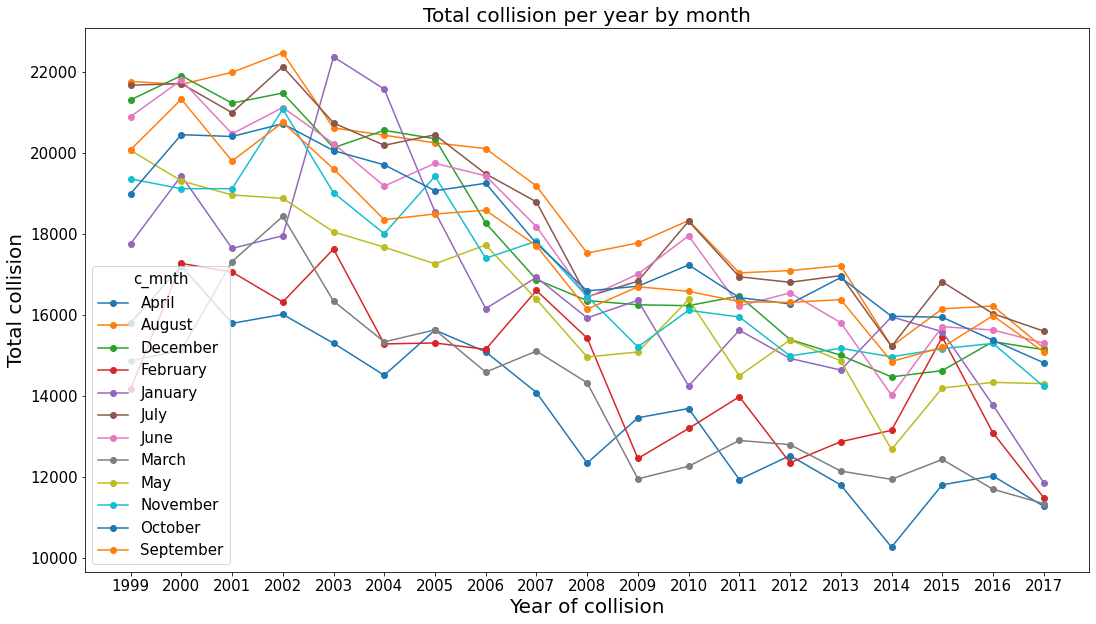

<Figure size 432x288 with 0 Axes>

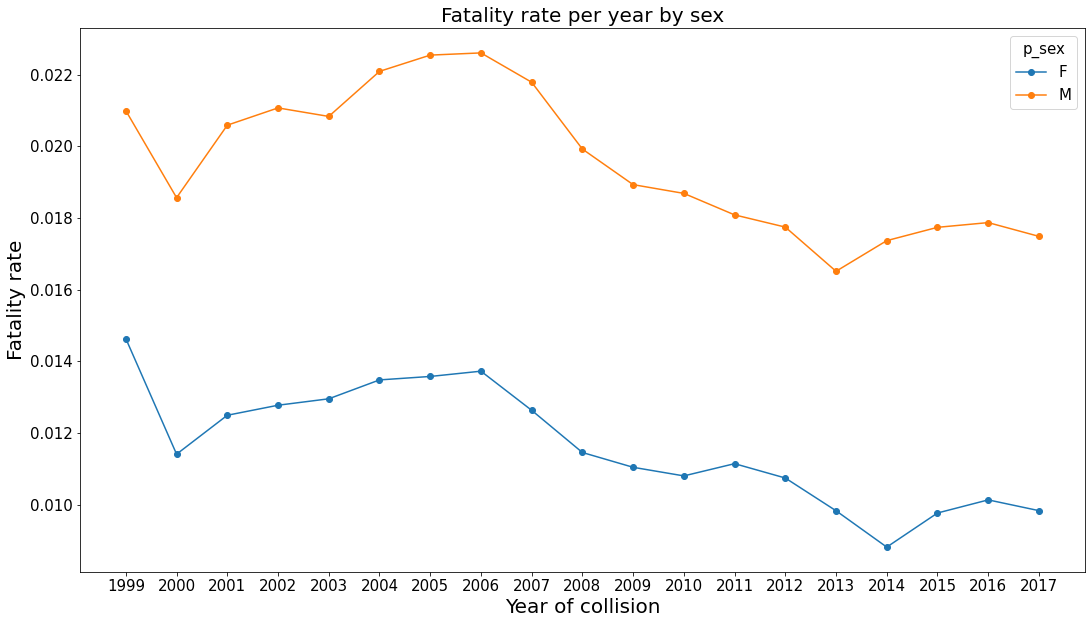

In [22]:
#  Plot figure
table_year1 = df.pivot_table('class', index = 'c_year', columns = 'c_wthr', aggfunc = 'mean')
table_year2 = df.pivot_table('year_ct', index = 'c_year', columns = 'c_mnth', aggfunc = 'count')
table_year3 = df.pivot_table('class', index = 'c_year', columns = 'p_sex', aggfunc = 'mean')

table_year1.plot(marker = 'o',figsize = (18,10))
plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Fatality rate', fontsize = 20)
plt.title('Fatality rate per year by weather', fontsize = 20)
plt.xticks(np.arange(1999,2018,1))
plt.savefig('../image/fig1a.png')

plt.figure()
table_year2.plot(marker = 'o',figsize = (18,10))
plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Total collision', fontsize = 20)
plt.title('Total collision per year by month', fontsize = 20)
plt.xticks(np.arange(1999,2018,1))
plt.savefig('../image/fig1b.png')

plt.figure()
table_year3.plot(marker = 'o',figsize = (18,10))
plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Fatality rate', fontsize = 20)
plt.title('Fatality rate per year by sex', fontsize = 20)
plt.xticks(np.arange(1999,2018,1))
plt.savefig('../image/fig1c.png')

# Fatality rate by collision configuration

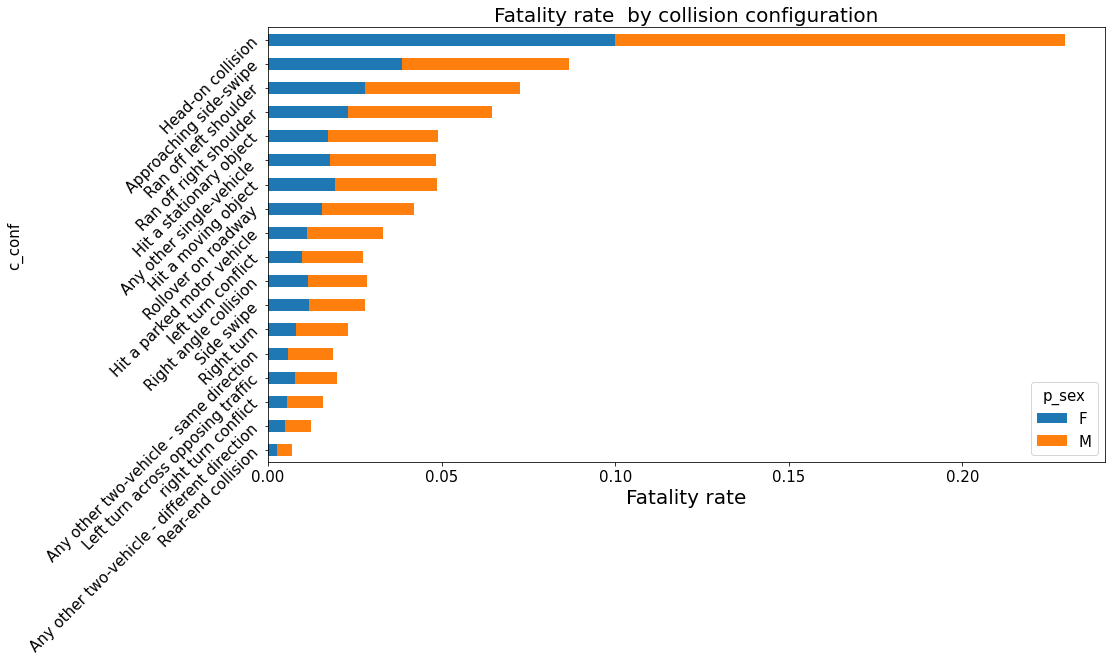

In [24]:
#  Plot figure
table_year = df.pivot_table('class', index = 'c_conf', columns = 'p_sex', aggfunc = 'mean')
table_year.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8))

plt.xlabel('Fatality rate', fontsize = 20)
# plt.ylabel('collision configuration', fontsize = 20)
plt.title('Fatality rate  by collision configuration', fontsize = 20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig_conf.png')

# Fatality rate by person position

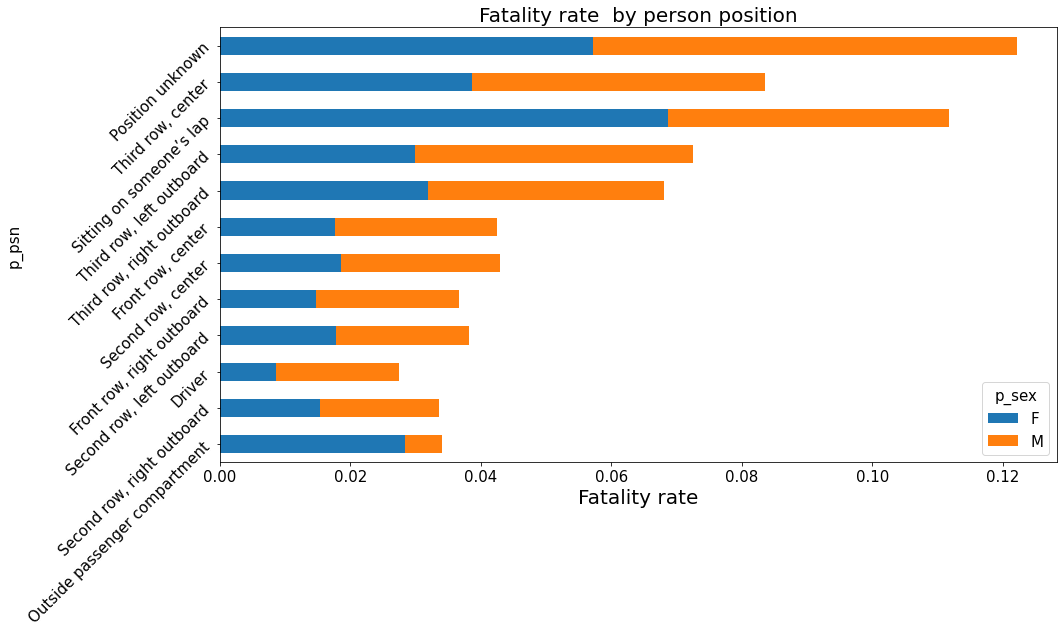

In [26]:
#  Plot figure
table_year = df.pivot_table('class', index = 'p_psn', columns = 'p_sex', aggfunc = 'mean')
table_year.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8))

plt.xlabel('Fatality rate', fontsize = 20)
# plt.ylabel('Person position', fontsize = 20)
plt.title('Fatality rate  by person position', fontsize = 20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig_p.png')

# Vechicle types with the most fatal collisions
- Most fatal accident are caused by road tractor

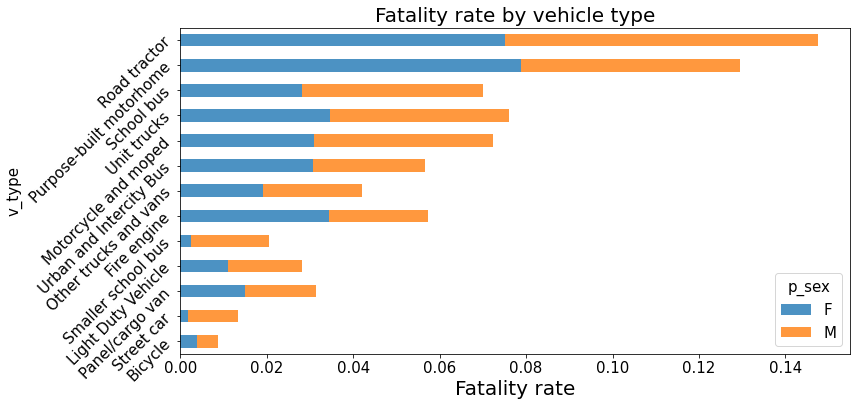

In [28]:
# Plot figure
table_vtype = df.pivot_table('class', index = 'v_type', columns = 'p_sex', aggfunc = 'mean')
table_vtype.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

# plt.ylabel('Vehicle type', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(loc= 'lower right', title = 'p_sex')
plt.title('Fatality rate by vehicle type', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig6.pdf')

# Total collision and fatality rate per month
- Fatal accidents are mostly likely in July and August, i.e. during the summer season. They also occur mostly on weekends

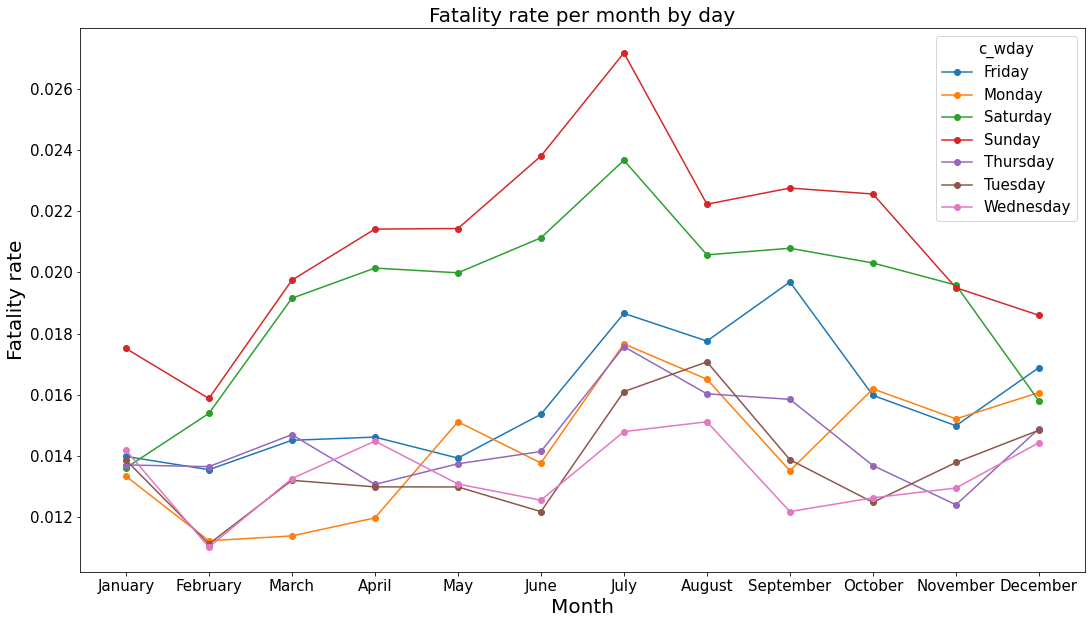

<Figure size 432x288 with 0 Axes>

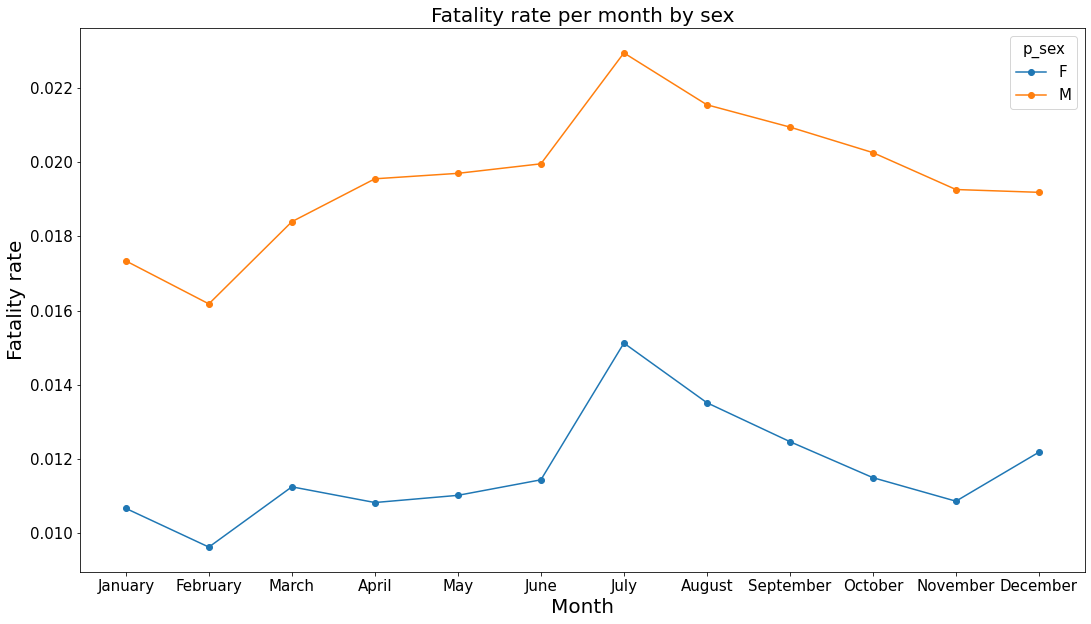

<Figure size 432x288 with 0 Axes>

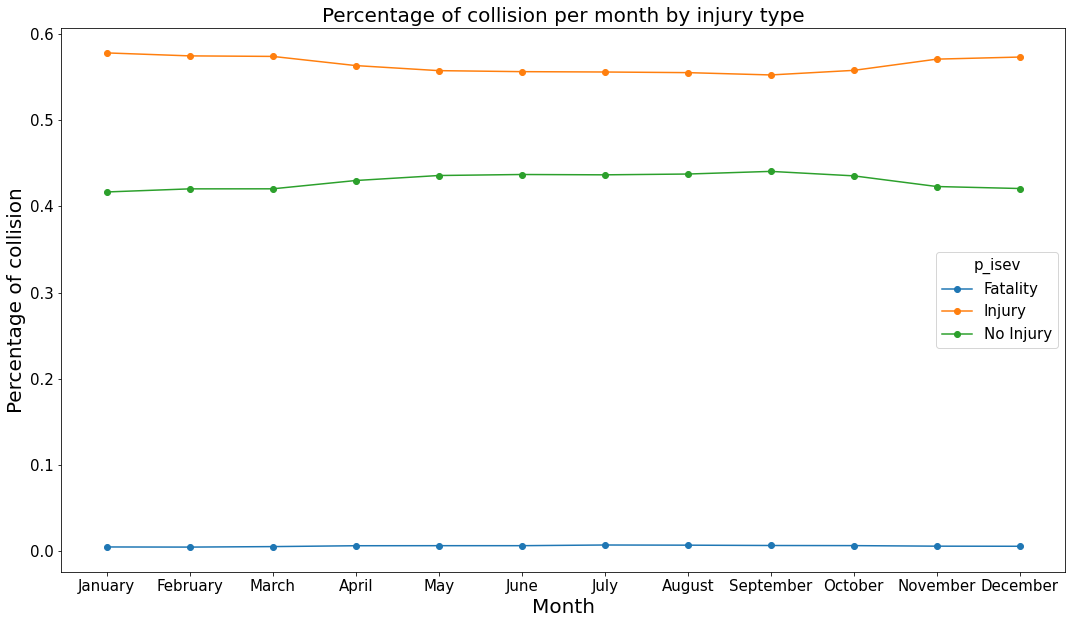

In [38]:
# Change month to integer
month_dict = {'January':1, 'February':2, 'March':3, 'April':4,  'May':5, 'June':6, 
                'July':7,'August':8, 'September':9,'October':10, 'November':11, 
                'December':12
                }
df2 = df.copy()
df2['c_mnth'].replace(month_dict, inplace = True)

# Pivot tables
table_month1 = df2.pivot_table('class', index = 'c_mnth', columns = 'c_wday', aggfunc = 'mean')

table_month2 = df2.pivot_table('mnth_ct', index = 'c_mnth', columns = 'p_isev', aggfunc = 'count', margins = True, margins_name = 'Total')
table_month2['Fatality'] = table_month2['Fatality']/table_month2['Total']
table_month2['Injury'] = table_month2['Injury']/table_month2['Total']
table_month2['No Injury'] = table_month2['No Injury']/table_month2['Total']
table_month2.drop('Total', axis =1, inplace=True)

table_month3 = df2.pivot_table('class', index = 'c_mnth', columns = 'p_sex', aggfunc = 'mean')

tick1 = list(table_month1.index)
tick2 = list(table_month2.index)
tick2.remove('Total')
tick3 = list(table_month3.index)

# Plot figure
table_month1.plot(marker = 'o',  figsize = (18,10), linewidth = 1.5)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Fatality rate', fontsize =20)
plt.title('Fatality rate per month by day', fontsize =20)
plt.xticks(tick1, list(month_dict.keys()))
plt.savefig('../image/fig9b.png')
plt.show()

plt.figure()
table_month3.plot(marker = 'o',  figsize = (18,10), linewidth = 1.5)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Fatality rate', fontsize =20)
plt.title('Fatality rate per month by sex', fontsize =20)
plt.xticks(tick3, list(month_dict.keys()))
plt.savefig('../image/fig9c.png')
plt.show()

plt.figure()
table_month2.drop('Total').plot(marker = 'o',  figsize = (18,10), linewidth = 1.5)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Percentage of collision', fontsize =20)
plt.title('Percentage of collision per month by injury type', fontsize =20)
plt.xticks(tick2, list(month_dict.keys()))
plt.savefig('../image/fig9a.png')
plt.show()

#  Fatality rate by weather condition
- The fatal collisions occur mostly due to visibility limitation

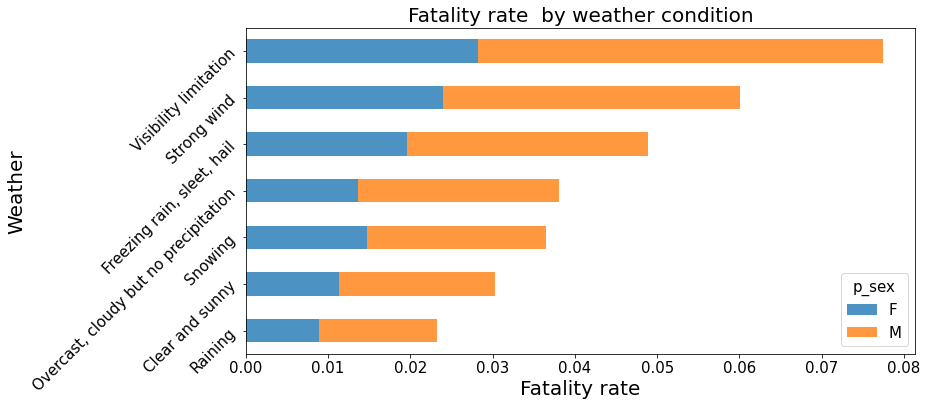

In [30]:
# Plot figure
table_weather = df.pivot_table('class', index = 'c_wthr', columns = 'p_sex', aggfunc = 'mean')
table_weather.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Weather', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.title('Fatality rate  by weather condition', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig10.pdf')

#  Fatality rate by road configuration
- Most fatal accidents occur at passing or climbing lane

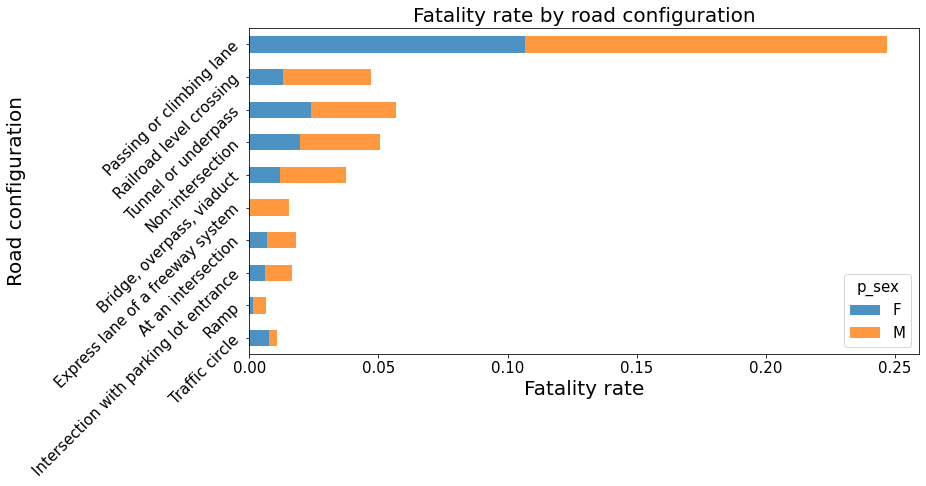

In [31]:
# Plot figure
table_road = df.pivot_table('class', index = 'c_rcfg', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road configuration', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road configuration', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig11.pdf')

#  Fatality rate by Road alignment
- Most fatal accidents occur by curved and gradient road alignment

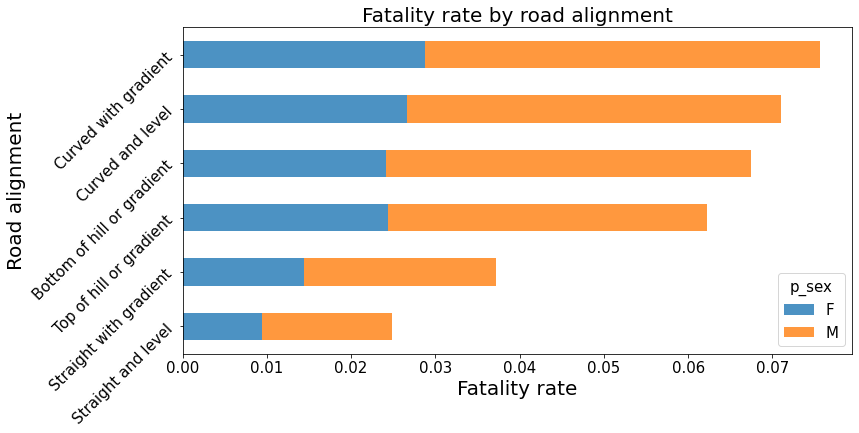

In [32]:
# Plot figure
table_road = df.pivot_table('class', index = 'c_raln', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road alignment', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road alignment', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig13.png')